In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [62]:
df = pd.read_csv('data/bank-full.csv', sep=';')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [99]:
df.sample(10).transpose()

,1925,19226,28576,14184,43910,24572,32808,6252,39132,40331
age,36,48,31,54,21,39,55,42,34,24
job,blue-collar,technician,technician,retired,student,entrepreneur,management,admin.,blue-collar,technician
marital,married,married,single,married,single,married,married,single,married,single
education,secondary,secondary,secondary,primary,unknown,tertiary,secondary,secondary,primary,secondary
default,no,no,no,no,no,no,no,no,no,no
balance,198,7020,304,0,53,2,566,-847,392,987
housing,yes,no,no,yes,no,yes,yes,yes,yes,no
loan,no,no,no,no,no,no,no,no,no,yes
contact,unknown,cellular,cellular,cellular,cellular,cellular,cellular,unknown,cellular,cellular
day,9,6,29,11,14,17,17,27,18,17


In [69]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [48]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [97]:
for col in df.columns:
    print('{:10} : {:4}'.format(col, df[col].nunique()))

age        :   77
job        :   12
marital    :    3
education  :    4
default    :    2
balance    : 7168
housing    :    2
loan       :    2
contact    :    3
day        :   31
month      :   12
duration   : 1573
campaign   :   48
pdays      :  559
previous   :   41
poutcome   :    4
y          :    2


In [49]:
for col in df.columns:
    if df[col].nunique() < 20:
        print('=============')
        print(col)
        print(round(1e2*df[col].value_counts()/len(df),2))

job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64
marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64
education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64
default
no     98.2
yes     1.8
Name: default, dtype: float64
housing
yes    55.58
no     44.42
Name: housing, dtype: float64
loan
no     83.98
yes    16.02
Name: loan, dtype: float64
contact
cellular     64.77
unknown      28.80
telephone     6.43
Name: contact, dtype: float64
month
may    30.45
jul    15.25
aug    13.82
jun    11.81
nov     8.78
apr     6.49
feb     5.86
jan     3.10
oct     1.63
sep     1.28
mar     1.06
dec     0.47
Name: month, dtype: float64
poutcome
unknow

age


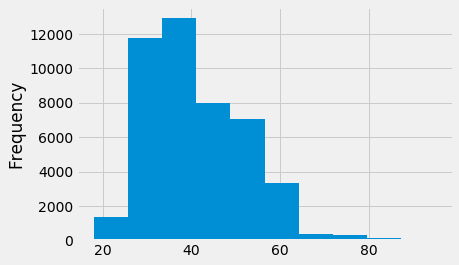

balance


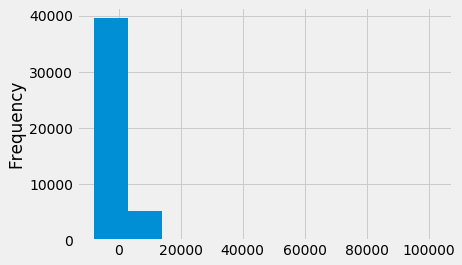

day


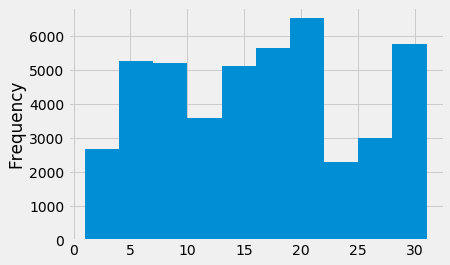

duration


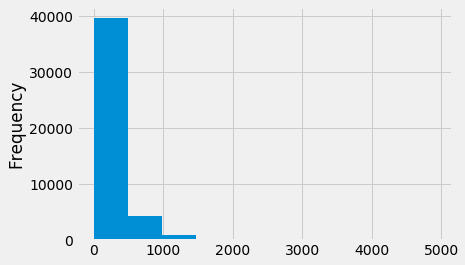

campaign


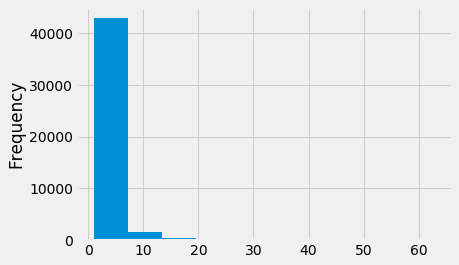

pdays


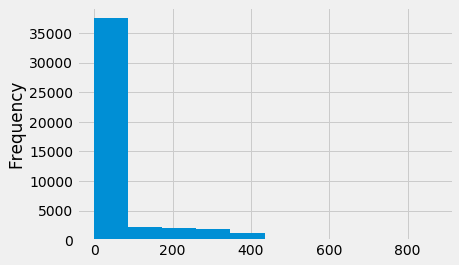

previous


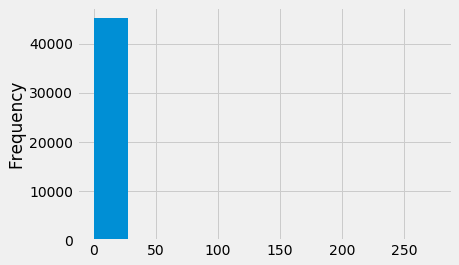

In [51]:
for col in df.columns:
    if df[col].nunique() > 20:
        print('=============')
        print(col)
        df[col].plot(kind='hist')
        plt.show()